# Exploratory Analysis

C:\Users\kaviy\AppData\Local\Temp\ipykernel_4040\1996743826.py:73: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cleaned_data[['QTY', 'VALUE', 'MONTH']].corr()


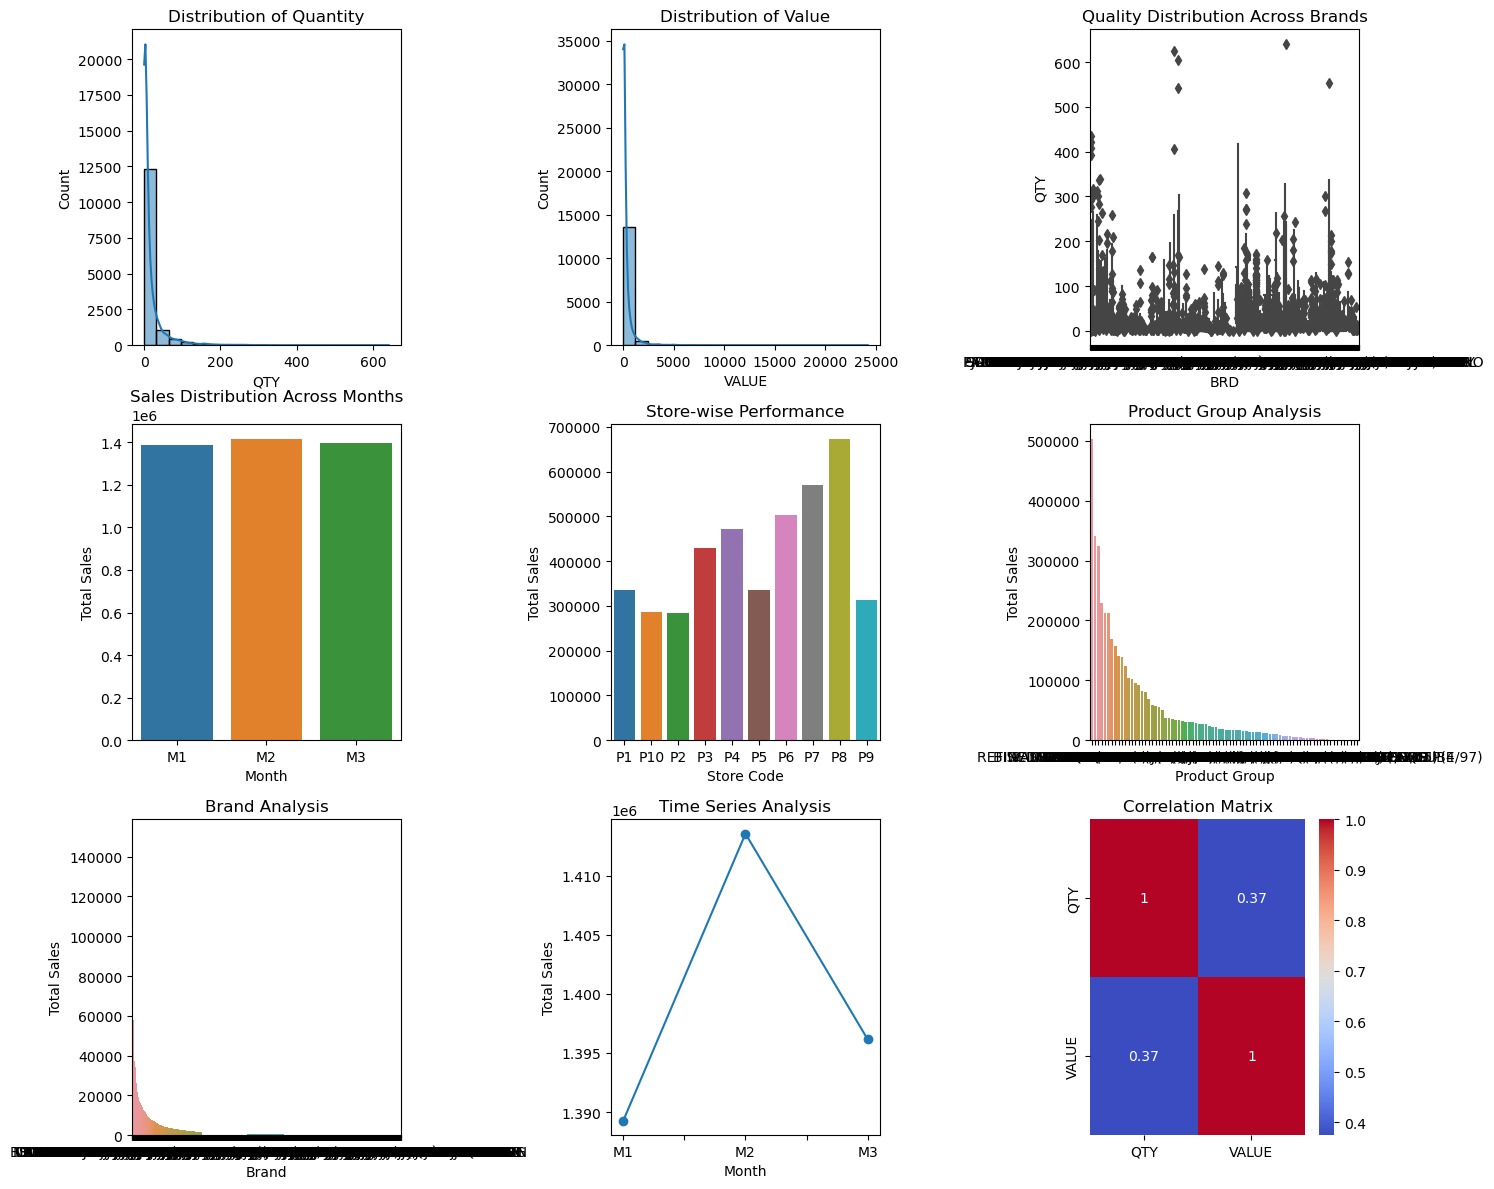


Total Sales per Month:
MONTH
M1    1389256
M2    1413538
M3    1396139
Name: VALUE, dtype: int64


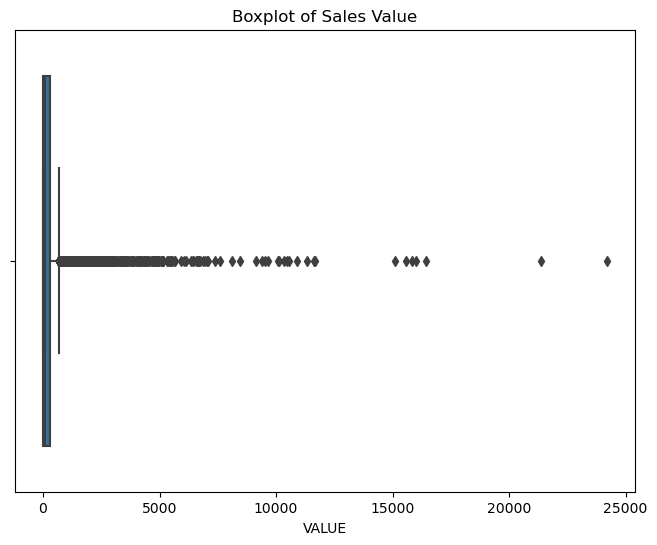

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data from Excel into a Pandas DataFrame
file_path = 'Hackathon_Ideal_Data.csv'  # Replace with the actual path to your Excel file
df = pd.read_csv(file_path)

# Data Cleaning
cleaned_data = df.dropna()  # Drop rows with missing values

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(15, 12))

# Distribution of Quantity
plt.subplot(3, 3, 1)
sns.histplot(cleaned_data['QTY'], bins=20, kde=True)
plt.title('Distribution of Quantity')

# Distribution of Value
plt.subplot(3, 3, 2)
sns.histplot(cleaned_data['VALUE'], bins=20, kde=True)
plt.title('Distribution of Value')

# Quality Distribution Across Brands
plt.subplot(3, 3, 3)
sns.boxplot(x='BRD', y='QTY', data=cleaned_data)
plt.title('Quality Distribution Across Brands')

# Sales Distribution Across Months
plt.subplot(3, 3, 4)
monthly_sales = cleaned_data.groupby('MONTH')['VALUE'].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Sales Distribution Across Months')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Store-wise Performance
plt.subplot(3, 3, 5)
store_performance = cleaned_data.groupby('STORECODE')['VALUE'].sum()
sns.barplot(x=store_performance.index, y=store_performance.values)
plt.title('Store-wise Performance')
plt.xlabel('Store Code')
plt.ylabel('Total Sales')

# Product Group (GRP) Analysis
plt.subplot(3, 3, 6)
grp_sales = cleaned_data.groupby('GRP')['VALUE'].sum().sort_values(ascending=False)
sns.barplot(x=grp_sales.index, y=grp_sales.values)
plt.title('Product Group Analysis')
plt.xlabel('Product Group')
plt.ylabel('Total Sales')

# Brand (BRD) Analysis
plt.subplot(3, 3, 7)
brd_sales = cleaned_data.groupby('BRD')['VALUE'].sum().sort_values(ascending=False)
sns.barplot(x=brd_sales.index, y=brd_sales.values)
plt.title('Brand Analysis')
plt.xlabel('Brand')
plt.ylabel('Total Sales')

# Time Series Analysis
plt.subplot(3, 3, 8)
time_series = cleaned_data.groupby('MONTH')['VALUE'].sum()
time_series.plot(kind='line', marker='o')
plt.title('Time Series Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Correlation Analysis
plt.subplot(3, 3, 9)
correlation_matrix = cleaned_data[['QTY', 'VALUE', 'MONTH']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

# Additional Analyses
# RFM Analysis (Example)
rfm_data = cleaned_data[['QTY', 'VALUE', 'MONTH']]
total_sales_per_month = rfm_data.groupby('MONTH')['VALUE'].sum()
print("\nTotal Sales per Month:")
print(total_sales_per_month)

# Outliers Detection (Example)
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_data['VALUE'])
plt.title('Boxplot of Sales Value')
plt.show()

# Geographical Analysis (Assuming geographical information is available)
# (Add relevant code based on the available geographical columns)


# Apriori Analysis 

D:\Anaconda\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


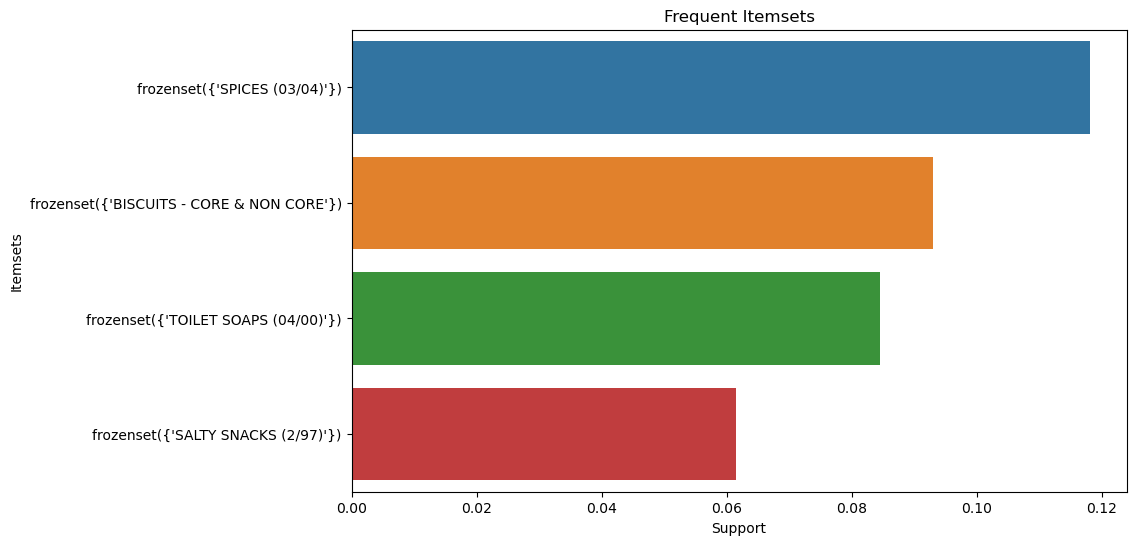

Top Frequent Itemsets:
    support                      itemsets
2  0.118022              (SPICES (03/04))
0  0.092917  (BISCUITS - CORE & NON CORE)
3  0.084432        (TOILET SOAPS (04/00))
1  0.061501         (SALTY SNACKS (2/97))


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules

# Load the data from Excel into a Pandas DataFrame
#df = pd.read_csv(file_path)

# Data Cleaning (if needed)
cleaned_data = df.dropna()  # Drop rows with missing values

# Convert categorical columns to string type
df['GRP'] = df['GRP'].astype(str)
df['BRD'] = df['BRD'].astype(str)

# Perform one-hot encoding for Apriori algorithm
basket = pd.get_dummies(df[['GRP', 'BRD']], prefix='', prefix_sep='')

# Run Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.05, use_colnames=True)

# Visualize frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x='support', y='itemsets', data=frequent_itemsets.sort_values(by='support', ascending=False))
plt.title('Frequent Itemsets')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()

# Display top frequent itemsets
print("Top Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())
